In [1]:
# Author
# Irshal Firdeansyah

# Github
# https://github.com/irlfdyh

In [1]:
# Load healthcare data

import pandas as pd

data_source = "dataset/healthcare_dataset.csv"

df = pd.read_csv(data_source, delimiter=',')

df

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [3]:
# count null value
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [4]:
# check balanced class for test result feature.

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OrdinalEncoder

smote = RandomOverSampler(sampling_strategy="auto")

x_binary = OrdinalEncoder()

x = x_binary.fit_transform(df)

x = pd.DataFrame(x, columns=["Name", "Age" ,"Gender", "Blood Type", "Medical Condition", "Date of Admission", "Doctor" ,"Hospital", "Insurance Provider", "Billing Amount", "Room Number", "Admission Type","Discharge Date", "Medication", "Test Results"])

x

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,8837.0,63.0,0.0,7.0,3.0,1468.0,7167.0,7960.0,3.0,7439.0,45.0,0.0,1476.0,0.0,1.0
1,7736.0,17.0,1.0,6.0,1.0,1664.0,2597.0,978.0,4.0,9444.0,303.0,1.0,1672.0,2.0,2.0
2,1508.0,43.0,1.0,5.0,5.0,71.0,7180.0,7996.0,3.0,7329.0,191.0,1.0,96.0,2.0,2.0
3,721.0,31.0,1.0,5.0,1.0,548.0,1169.0,2482.0,3.0,4589.0,379.0,2.0,544.0,4.0,0.0
4,6782.0,33.0,1.0,7.0,0.0,980.0,2775.0,3908.0,4.0,3469.0,376.0,2.0,996.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3582.0,65.0,1.0,0.0,5.0,1359.0,7926.0,8474.0,4.0,7883.0,9.0,0.0,1355.0,1.0,0.0
9996,8307.0,29.0,0.0,2.0,0.0,1159.0,1856.0,5394.0,1.0,1007.0,143.0,1.0,1172.0,1.0,2.0
9997,1792.0,36.0,1.0,5.0,0.0,1331.0,7655.0,4214.0,1.0,9901.0,211.0,0.0,1337.0,1.0,2.0
9998,273.0,66.0,1.0,0.0,0.0,462.0,3770.0,8420.0,4.0,4995.0,319.0,2.0,477.0,4.0,2.0


In [5]:
x_source = x.drop(['Name', 'Date of Admission', 'Hospital', 'Billing Amount', 'Room Number', 'Discharge Date'], axis=1)
x_source

,Age,Gender,Blood Type,Medical Condition,Doctor,Insurance Provider,Admission Type,Medication,Test Results
0,63.0,0.0,7.0,3.0,7167.0,3.0,0.0,0.0,1.0
1,17.0,1.0,6.0,1.0,2597.0,4.0,1.0,2.0,2.0
2,43.0,1.0,5.0,5.0,7180.0,3.0,1.0,2.0,2.0
3,31.0,1.0,5.0,1.0,1169.0,3.0,2.0,4.0,0.0
4,33.0,1.0,7.0,0.0,2775.0,4.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...
9995,65.0,1.0,0.0,5.0,7926.0,4.0,0.0,1.0,0.0
9996,29.0,0.0,2.0,0.0,1856.0,1.0,1.0,1.0,2.0
9997,36.0,1.0,5.0,0.0,7655.0,1.0,0.0,1.0,2.0
9998,66.0,1.0,0.0,0.0,3770.0,4.0,2.0,4.0,2.0


In [6]:
y = x["Test Results"]
print(y)
print(y.shape)

0       1.0
1       2.0
2       2.0
3       0.0
4       2.0
       ... 
9995    0.0
9996    2.0
9997    2.0
9998    2.0
9999    0.0
Name: Test Results, Length: 10000, dtype: float64
(10000,)


In [7]:
x_smote, y_smote = smote.fit_resample(x, y)
x_smote

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,8837.0,63.0,0.0,7.0,3.0,1468.0,7167.0,7960.0,3.0,7439.0,45.0,0.0,1476.0,0.0,1.0
1,7736.0,17.0,1.0,6.0,1.0,1664.0,2597.0,978.0,4.0,9444.0,303.0,1.0,1672.0,2.0,2.0
2,1508.0,43.0,1.0,5.0,5.0,71.0,7180.0,7996.0,3.0,7329.0,191.0,1.0,96.0,2.0,2.0
3,721.0,31.0,1.0,5.0,1.0,548.0,1169.0,2482.0,3.0,4589.0,379.0,2.0,544.0,4.0,0.0
4,6782.0,33.0,1.0,7.0,0.0,980.0,2775.0,3908.0,4.0,3469.0,376.0,2.0,996.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,4092.0,51.0,1.0,7.0,2.0,1668.0,4719.0,1257.0,3.0,4525.0,337.0,1.0,1676.0,4.0,2.0
10364,2365.0,65.0,0.0,0.0,2.0,918.0,8035.0,3173.0,1.0,4300.0,176.0,0.0,934.0,1.0,2.0
10365,6722.0,60.0,1.0,7.0,2.0,793.0,4788.0,4929.0,3.0,4947.0,253.0,1.0,808.0,1.0,2.0
10366,899.0,36.0,0.0,5.0,4.0,1800.0,4437.0,7419.0,1.0,2094.0,189.0,2.0,1812.0,4.0,2.0


In [8]:
x_smote.std()

Name                  2701.521501
Age                     19.593905
Gender                   0.499973
Blood Type               2.285153
Medical Condition        1.701232
Date of Admission      518.880513
Doctor                2713.010224
Hospital              2496.804036
Insurance Provider       1.411430
Billing Amount        2882.724141
Room Number            115.840061
Admission Type           0.814486
Discharge Date         518.057398
Medication               1.418751
Test Results             0.816536
dtype: float64

<Axes: >

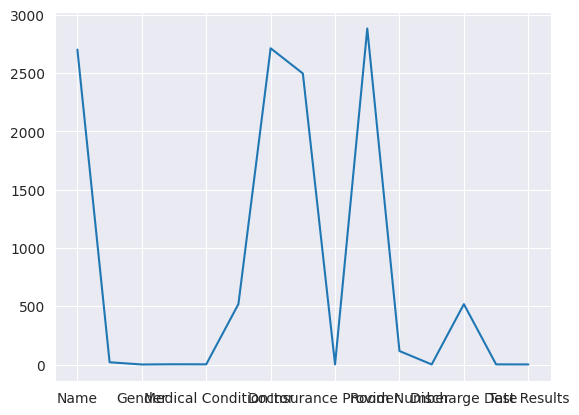

In [9]:
x_smote.std().plot()

<Axes: >

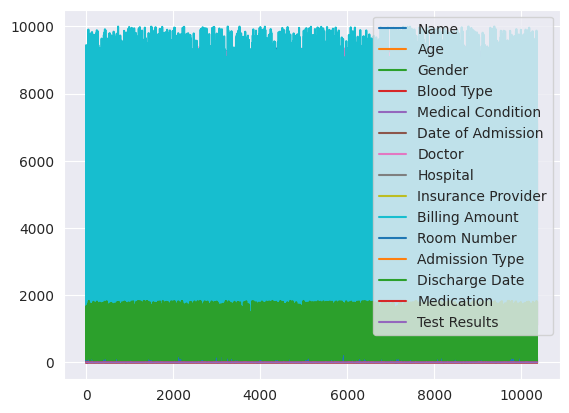

In [10]:
x_smote.plot()

In [11]:
x_smote.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,8837.0,63.0,0.0,7.0,3.0,1468.0,7167.0,7960.0,3.0,7439.0,45.0,0.0,1476.0,0.0,1.0
1,7736.0,17.0,1.0,6.0,1.0,1664.0,2597.0,978.0,4.0,9444.0,303.0,1.0,1672.0,2.0,2.0
2,1508.0,43.0,1.0,5.0,5.0,71.0,7180.0,7996.0,3.0,7329.0,191.0,1.0,96.0,2.0,2.0
3,721.0,31.0,1.0,5.0,1.0,548.0,1169.0,2482.0,3.0,4589.0,379.0,2.0,544.0,4.0,0.0
4,6782.0,33.0,1.0,7.0,0.0,980.0,2775.0,3908.0,4.0,3469.0,376.0,2.0,996.0,3.0,2.0


<Axes: >

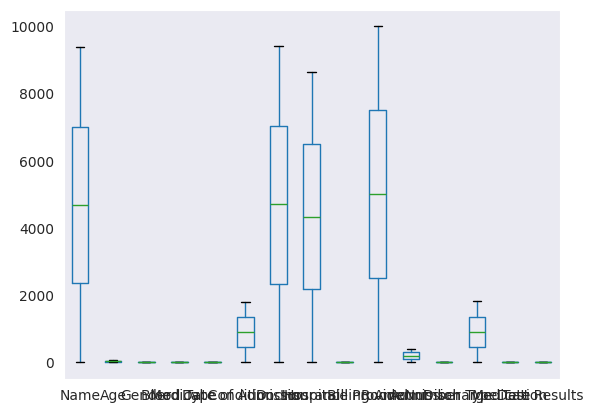

In [12]:
x_smote.boxplot(grid=False)

In [13]:
x_smote.corr()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Name,1.000000,-0.004644,-0.015274,-0.011157,0.019472,0.000215,-0.005919,-0.017149,-0.004886,-0.008400,-0.005270,-0.012035,-0.000055,-0.015652,0.014851
Age,-0.004644,1.000000,-0.005128,-0.006768,-0.007734,-0.012842,0.019368,-0.009108,-0.000290,-0.007395,-0.004792,0.003119,-0.012680,0.010435,0.008278
Gender,-0.015274,-0.005128,1.000000,0.012081,-0.005332,0.014452,0.016997,-0.000665,-0.021194,0.002979,0.001529,-0.004289,0.014399,0.006787,-0.008979
Blood Type,-0.011157,-0.006768,0.012081,1.000000,-0.004895,0.001526,0.006013,0.014370,0.026297,-0.005551,0.002292,-0.005205,0.001632,-0.004892,-0.004859
Medical Condition,0.019472,-0.007734,-0.005332,-0.004895,1.000000,0.006841,0.010392,0.004133,0.007413,0.006795,-0.005064,0.020130,0.006583,-0.001431,0.000625
Date of Admission,0.000215,-0.012842,0.014452,0.001526,0.006841,1.000000,-0.009890,0.014505,0.002107,0.001579,0.004447,0.004979,0.999863,0.008099,-0.003259
Doctor,-0.005919,0.019368,0.016997,0.006013,0.010392,-0.009890,1.000000,0.020386,-0.022393,-0.016034,0.002566,0.006157,-0.010243,-0.004782,0.003987
Hospital,-0.017149,-0.009108,-0.000665,0.014370,0.004133,0.014505,0.020386,1.000000,0.014514,0.001316,0.010051,-0.021104,0.014483,0.006607,-0.001643
Insurance Provider,-0.004886,-0.000290,-0.021194,0.026297,0.007413,0.002107,-0.022393,0.014514,1.000000,-0.014339,-0.006462,0.014355,0.002016,0.007761,-0.010546
Billing Amount,-0.008400,-0.007395,0.002979,-0.005551,0.006795,0.001579,-0.016034,0.001316,-0.014339,1.000000,-0.008083,0.003711,0.001313,-0.017646,-0.004406


In [14]:
x_smote.skew()

Name                 -0.003696
Age                  -0.012778
Gender                0.028556
Blood Type            0.004533
Medical Condition     0.014820
Date of Admission     0.004131
Doctor               -0.003018
Hospital             -0.012651
Insurance Provider    0.025112
Billing Amount       -0.001845
Room Number           0.016423
Admission Type       -0.034482
Discharge Date        0.006335
Medication           -0.009411
Test Results          0.000000
dtype: float64

<Axes: >

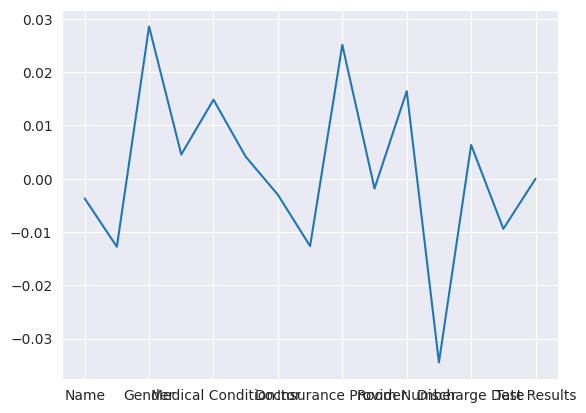

In [15]:
x_smote.skew().plot()

In [16]:
x_smote.value_counts()

Name    Age   Gender  Blood Type  Medical Condition  Date of Admission  Doctor  Hospital  Insurance Provider  Billing Amount  Room Number  Admission Type  Discharge Date  Medication  Test Results
3516.0  6.0   0.0     5.0         1.0                187.0              8385.0  8093.0    1.0                 3258.0          33.0         2.0             212.0           4.0         1.0             3
2644.0  29.0  0.0     1.0         3.0                126.0              4048.0  2864.0    3.0                 3360.0          210.0        1.0             131.0           4.0         2.0             3
6735.0  55.0  1.0     3.0         1.0                307.0              9309.0  3684.0    2.0                 358.0           9.0          1.0             308.0           0.0         2.0             3
8105.0  22.0  0.0     6.0         5.0                1200.0             7327.0  4231.0    4.0                 6171.0          279.0        1.0             1197.0          0.0         1.0             3


In [17]:
x_smote.size

155520

In [18]:
x_smote.shape

(10368, 15)

In [19]:
x_smote.dtypes

Name                  float64
Age                   float64
Gender                float64
Blood Type            float64
Medical Condition     float64
Date of Admission     float64
Doctor                float64
Hospital              float64
Insurance Provider    float64
Billing Amount        float64
Room Number           float64
Admission Type        float64
Discharge Date        float64
Medication            float64
Test Results          float64
dtype: object

/home/irlfdyh/Documents/UNIVERSITY/STUDY/S7/TUGAS-PROYEK-DATA-MINING/playground/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Age', ylabel='Doctor'>

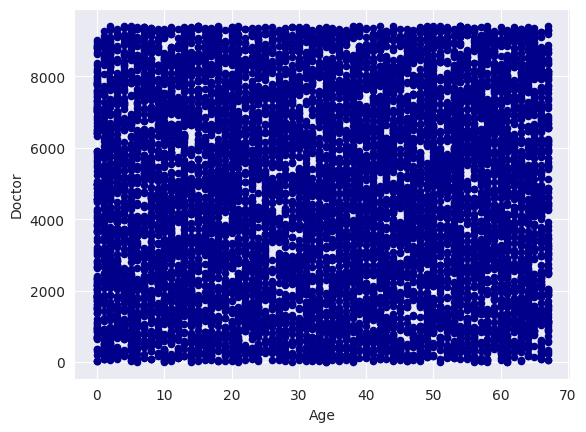

In [20]:
x_smote.plot.scatter(
    x = "Age",
    y = "Doctor",
    c = "DarkBlue",
    colormap = "viridis"
)

array([[<Axes: title={'center': 'Name'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Blood Type'}>],
       [<Axes: title={'center': 'Medical Condition'}>,
        <Axes: title={'center': 'Date of Admission'}>,
        <Axes: title={'center': 'Doctor'}>,
        <Axes: title={'center': 'Hospital'}>],
       [<Axes: title={'center': 'Insurance Provider'}>,
        <Axes: title={'center': 'Billing Amount'}>,
        <Axes: title={'center': 'Room Number'}>,
        <Axes: title={'center': 'Admission Type'}>],
       [<Axes: title={'center': 'Discharge Date'}>,
        <Axes: title={'center': 'Medication'}>,
        <Axes: title={'center': 'Test Results'}>, <Axes: >]], dtype=object)

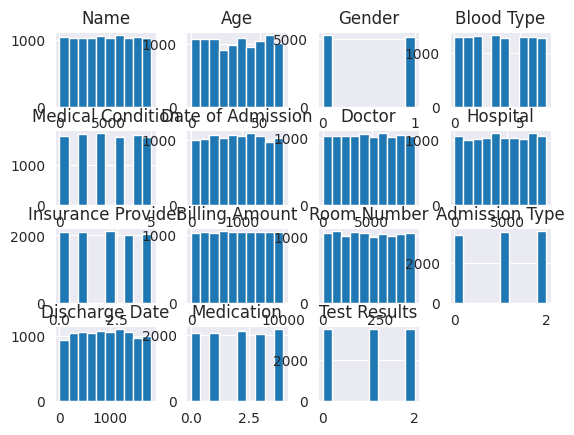

In [21]:
x_smote.hist()

In [22]:
x_smote.index

RangeIndex(start=0, stop=10368, step=1)

(3111,)
  classifier       prediction  accuracy
0         NB  MultinomialNB()  0.344262


/tmp/ipykernel_82133/815689851.py:40: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


<Axes: xlabel='classifier', ylabel='accuracy'>

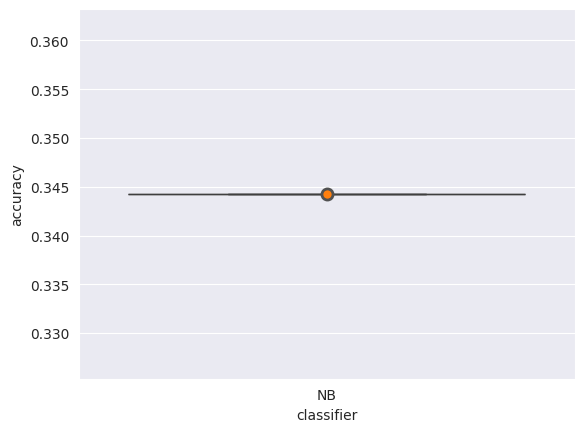

In [23]:
import pandas as pd    
import numpy as np
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=1)

NaiveBayes = MultinomialNB().fit(x_train, np.ravel(y_train, order='C'))
Knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train, np.ravel(y_train, order='C'))
RandomForest = RandomForestClassifier(n_estimators=50, max_depth=3).fit(x_train, np.ravel(y_train, order='C'))
DTree = DecisionTreeClassifier().fit(x_train, np.ravel(y_train, order='C'))
MultiLP = MLPClassifier(max_iter= 100).fit(x_train, np.ravel(y_train, order='C'))
SuppVM = (SVC(gamma='scale', decision_function_shape='ovo', kernel = 'linear').fit(x_train, np.ravel(y_train, order='C')))

models = [ NaiveBayes ] 
dlist = [ 'NB' ]

i = 0
print(y_test.shape)
entries = []
for model in models:
  prediction = model.predict(x_test)
  accuracies = accuracy_score(y_test, prediction)
  nameS = dlist[i]
  entries.append((nameS, model, accuracies))
  i = i + 1

cv_df = pd.DataFrame(entries, columns=['classifier','prediction','accuracy'])
cv_df.to_csv('accuracy.csv')
print(cv_df)


sns.boxplot(x='classifier', y='accuracy', data=cv_df)
sns.stripplot(
    x='classifier', 
    y='accuracy', 
    data=cv_df,
    size=8, 
    jitter=True, 
    edgecolor="gray", 
    linewidth=2
)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_test)

prediction = MultinomialNB().fit(x_train, y_train)

prediction_result = prediction.predict(x_test)

print(classification_report(y_test, prediction_result))
print(prediction_result)

(7257, 15)
(3111, 15)
(7257,)
(3111,)
        Name   Age  Gender  Blood Type  Medical Condition  Date of Admission  \
5819   516.0  14.0     1.0         3.0                5.0             1158.0   
4663   922.0  34.0     0.0         7.0                5.0              511.0   
3231  5115.0  32.0     1.0         6.0                0.0             1615.0   
3461  7701.0  64.0     0.0         3.0                1.0              401.0   
3983  2634.0  20.0     0.0         4.0                5.0              859.0   
...      ...   ...     ...         ...                ...                ...   
1342  1942.0  65.0     0.0         2.0                0.0             1808.0   
8022  2510.0  29.0     0.0         2.0                5.0              694.0   
9300  9261.0  33.0     0.0         3.0                5.0              211.0   
6688  8794.0  15.0     1.0         0.0                1.0              750.0   
5717  3790.0  27.0     1.0         6.0                1.0             1338.0   

 